In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
mf[mf['code'] == 'A005930']

,code,trade_date,pm_5,pm_10,pm_20,pm_40,pm_60,pm_90,pm_120,pm_250,...,skew_250,turnover_5,turnover_10,turnover_20,turnover_40,turnover_60,turnover_90,turnover_120,turnover_250,log_mktcap
540417,A005930,2013-01-16,0.307322,0.214752,0.269412,0.615642,0.538814,0.557029,0.584363,0.605800,...,0.746597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540418,A005930,2013-01-17,0.275159,0.235175,0.278858,0.608623,0.549606,0.566829,0.570318,0.606448,...,0.745504,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540419,A005930,2013-01-18,0.273983,0.232215,0.232686,0.571636,0.521329,0.555522,0.538045,0.600005,...,0.746695,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540420,A005930,2013-01-21,0.249077,0.293283,0.155408,0.495594,0.501984,0.552491,0.519721,0.574298,...,0.737737,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540421,A005930,2013-01-22,0.252724,0.261267,0.181221,0.475156,0.530265,0.524139,0.514964,0.578236,...,0.738419,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542161,A005930,2020-02-24,0.481342,0.594053,0.524048,0.629722,0.570931,0.456609,0.621955,0.587540,...,0.504917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542162,A005930,2020-02-25,0.621167,0.622022,0.490795,0.635911,0.574655,0.455983,0.633129,0.583706,...,0.504948,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542163,A005930,2020-02-26,0.544780,0.594731,0.487116,0.628956,0.568410,0.574070,0.631351,0.586203,...,0.504860,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542164,A005930,2020-02-27,0.623055,0.587245,0.526480,0.622305,0.569714,0.572765,0.635776,0.581822,...,0.504515,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
ssvae = StyleScoreVAE(41)

In [5]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       beta=0.5, alpha=1000.)

In [6]:
trainer.train(epochs=10, batch_size=1024)

0 obj_loss: 127.73, recon: 31.92, overlap: 0.0092, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:17<00:00,  3.76it/s]
1 obj_loss: 64.61, recon: 35.92, overlap: 0.0088, sparsity: 0.0001: 100%|██████████| 3900/3900 [17:15<00:00,  3.76it/s]
2 obj_loss: 5.86, recon: 36.89, overlap: 0.0086, sparsity: 0.0000: 100%|███████████| 3900/3900 [17:15<00:00,  3.76it/s]
3 obj_loss: -11.03, recon: 37.09, overlap: 0.0088, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:15<00:00,  3.76it/s]
4 obj_loss: -23.48, recon: 37.32, overlap: 0.0087, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:15<00:00,  3.76it/s]
5 obj_loss: -24.84, recon: 37.65, overlap: 0.0089, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:15<00:00,  3.76it/s]
6 obj_loss: -23.97, recon: 37.86, overlap: 0.0088, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
7 obj_loss: -24.33, recon: 38.01, overlap: 0.0091, sparsity: 0.0000: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
8 obj_loss: -18.42, recon: 38.08, overla

In [7]:
len(trainer.train_results['train_obj_loss'])

10

In [8]:
import matplotlib.pyplot as plt

In [9]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

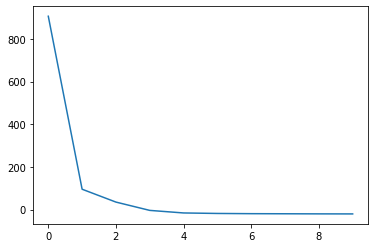

In [10]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

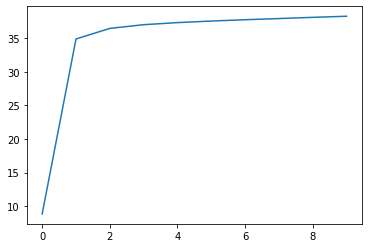

In [11]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

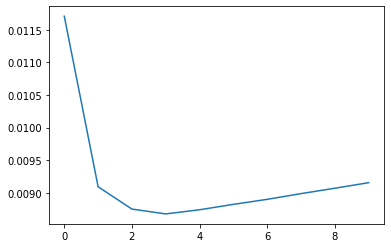

In [12]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

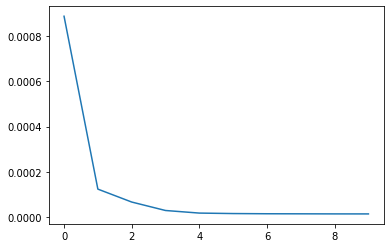

In [13]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [14]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [15]:
x = trainer.trainset[200].to(ssvae.device)
recon = ssvae.reconstruct(x)

In [16]:
qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

In [17]:
qz_x

Normal(loc: torch.Size([1, 16]), scale: torch.Size([1, 16]))

In [18]:
px_z

Laplace(loc: torch.Size([1, 41]), scale: torch.Size([1, 41]))

In [19]:
style_score

tensor([[-0.0653,  0.0564, -0.1351, -0.1106, -0.0526, -0.0239,  0.0183,  0.0260,
         -0.0794,  0.0259,  0.0193, -0.0950, -0.0857,  0.0149, -0.0600, -0.0539]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [20]:
ssvae.dec(style_score)

(tensor([[0.3890, 0.3613, 0.3580, 0.3800, 0.4198, 0.4175, 0.4071, 0.4591, 0.0000,
          0.2389, 0.1987, 0.1710, 0.1691, 0.1747, 0.1794, 0.2286, 0.9542, 0.9454,
          0.9349, 0.9312, 0.9243, 0.9089, 0.9018, 0.8899, 0.5106, 0.5294, 0.5229,
          0.5118, 0.5275, 0.5477, 0.5690, 0.5532, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.3462]], device='cuda:0',
        grad_fn=<ReluBackward1>), tensor(0.1000, device='cuda:0'))

In [21]:
traverse = np.arange(-3., 3.1, 0.1).astype(float)

In [22]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

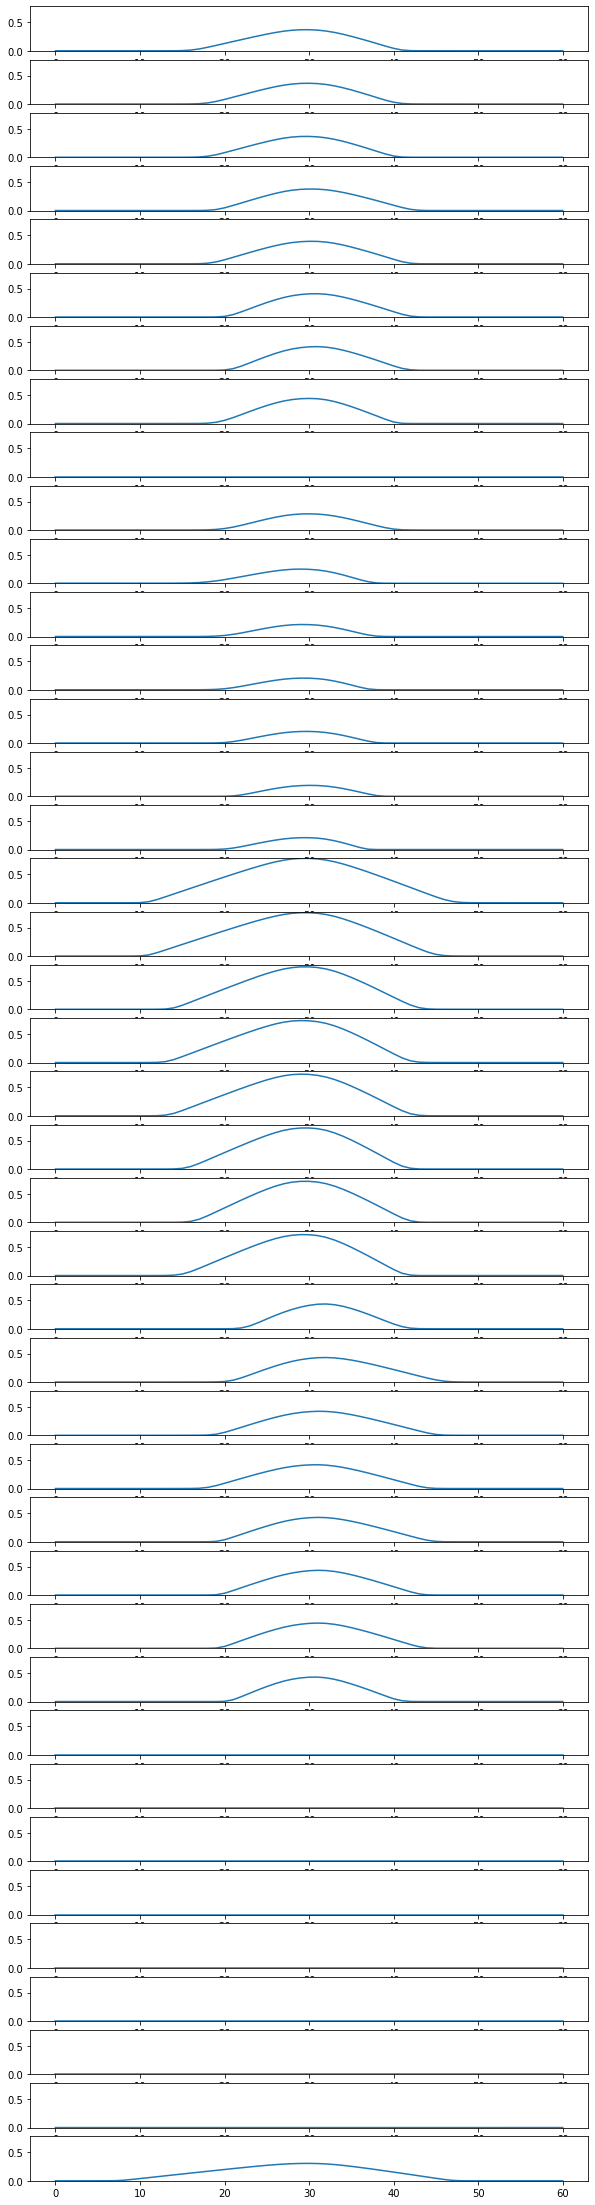

In [23]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 0] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(40)
fig.set_figwidth(10)
for i in range(traversals.shape[1]):
    axs[i].plot(traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())

In [19]:
traversals[:, 0]

array([0.66657332, 0.65887238, 0.6510933 , 0.64318051, 0.6351239 ,
       0.62691099, 0.61851754, 0.6099264 , 0.6010913 , 0.59200704,
       0.58266306, 0.5730819 , 0.56333554, 0.55343805, 0.54342802,
       0.53334742, 0.52321721, 0.51308967, 0.50300666, 0.49299113,
       0.48299569, 0.47301121, 0.46305022, 0.45306695, 0.44309143,
       0.43312115, 0.42310855, 0.41310123, 0.40316349, 0.39339367,
       0.38387347, 0.37452348, 0.36529753, 0.35623546, 0.34721917,
       0.33832432, 0.32950019, 0.32074155, 0.31209359, 0.30353027,
       0.2949846 , 0.28634391, 0.27754346, 0.26867321, 0.25977833,
       0.25100789, 0.24248595, 0.23431885, 0.22654806, 0.21922572,
       0.21240408, 0.20610247, 0.20035026, 0.19512344, 0.19028491,
       0.18581188, 0.18170402, 0.17784951, 0.17414818, 0.17054975,
       0.16702886])

In [20]:
traversals[:, 1]

array([0.57900399, 0.57019807, 0.56146227, 0.55281859, 0.54426256,
       0.53581861, 0.52747871, 0.51928058, 0.51126253, 0.50343578,
       0.49582363, 0.48842677, 0.48125178, 0.47427319, 0.46749368,
       0.46096057, 0.45466911, 0.44859963, 0.44271967, 0.43702842,
       0.43151988, 0.42618582, 0.42099652, 0.41594355, 0.41110653,
       0.40654941, 0.40241929, 0.39868445, 0.39528198, 0.39221172,
       0.38938161, 0.38667952, 0.38408457, 0.38152847, 0.37895712,
       0.37639894, 0.37381123, 0.37117116, 0.36840398, 0.36543959,
       0.36221373, 0.35865252, 0.35483302, 0.35094392, 0.3471353 ,
       0.34357883, 0.34042399, 0.33780884, 0.33583101, 0.33439137,
       0.33346967, 0.33303507, 0.33304862, 0.33343961, 0.33409822,
       0.33497029, 0.33601497, 0.33717261, 0.33841157, 0.33969131,
       0.34100837])